In [ ]:
# Lets Understand some of the most Interesting Patterns of Funding and Startups.
# How Does the Funding Ecosystem changes with respect to Time?
# What is the General Amount that Startups get in India?
# Which Kind of Industries are more preferred for Startups?
# Does Location also play a role, In determining the Growth of a Startup?
# Who plays the main role in Indian Startups Ecosystem?
# What are the different Types of Funding for Startups?

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
#reading the data
df = pd.read_csv("indiastartups1.csv")
df.head()

,Unnamed: 0,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
0,0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,202001
1,1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,202001
2,2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,202001
3,3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN,202001
4,4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,202001


# 1. Exploratory data analysis (EDA)

In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3044 non-null   int64  
 1   SNo               3044 non-null   int64  
 2   Date              3044 non-null   object 
 3   StartupName       3044 non-null   object 
 4   IndustryVertical  2873 non-null   object 
 5   SubVertical       2108 non-null   object 
 6   City              2864 non-null   object 
 7   InvestorsName     3020 non-null   object 
 8   InvestmentType    3040 non-null   object 
 9   AmountInUSD       3044 non-null   float64
 10  Remarks           419 non-null    object 
 11  yearmonth         3044 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 285.5+ KB


In [25]:
df.describe()

,Unnamed: 0,SNo,AmountInUSD,yearmonth
count,3044.000000,3044.000000,3.044000e+03,3044.000000
mean,1521.500000,1522.500000,1.327006e+07,201630.420828
std,878.871435,878.871435,1.044042e+08,111.330291
min,0.000000,1.000000,-9.990000e+02,201501.000000
25%,760.750000,761.750000,-9.990000e+02,201511.000000
50%,1521.500000,1522.500000,5.000000e+05,201607.000000
75%,2282.250000,2283.250000,4.000000e+06,201706.000000
max,3043.000000,3044.000000,3.900000e+09,202001.000000


In [26]:
df.shape

(3044, 12)

In [27]:
df.columns

Index(['Unnamed: 0', 'SNo', 'Date', 'StartupName', 'IndustryVertical',
       'SubVertical', 'City', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks', 'yearmonth'],
      dtype='object')

# 2. Data cleaning

In [146]:
df = df.drop(["Unnamed: 0", "SNo"], axis=1)
df.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,202001
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,202001
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,202001
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN,202001
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,202001


In [34]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)

Remarks             2625
SubVertical          936
City                 180
IndustryVertical     171
InvestorsName         24
InvestmentType         4
Date                   0
StartupName            0
AmountInUSD            0
yearmonth              0
dtype: int64

In [40]:
# percentage of missing data
total = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum() / df.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=["Total","Percent %"])
missing_data 

,Total,Percent %
Remarks,2625,86.235217
SubVertical,936,30.749014
City,180,5.913272
IndustryVertical,171,5.617608
InvestorsName,24,0.788436
InvestmentType,4,0.131406
Date,0,0.000000
StartupName,0,0.000000
AmountInUSD,0,0.000000
yearmonth,0,0.000000


In [147]:
df = df.drop("Remarks", axis=1)
df.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,202001
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202001
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202001


<AxesSubplot:>

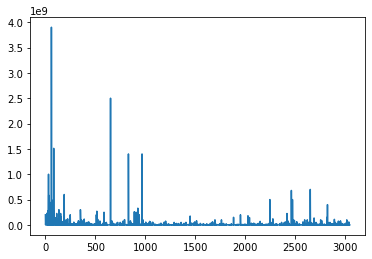

In [45]:
df["AmountInUSD"].plot(kind="line")

In [46]:
df["AmountInUSD"].max()

3900000000.0

In [65]:
# How Does the Funding Ecosystem changes with respect to Time?
(pd.to_datetime(df["Date"], format='%d/%m/%Y').dt.year * 100)

0       202000
1       202000
2       202000
3       202000
4       202000
         ...  
3039    201500
3040    201500
3041    201500
3042    201500
3043    201500
Name: Date, Length: 3044, dtype: int64

In [66]:
df["yearmonth"] = (pd.to_datetime(df["Date"], format='%d/%m/%Y').dt.year * 100)
+ (pd.to_datetime(df["Date"], format='%d/%m/%Y').dt.month)

0       202001
1       202001
2       202001
3       202001
4       202001
         ...  
3039    201501
3040    201501
3041    201501
3042    201501
3043    201501
Name: Date, Length: 3044, dtype: int64

In [72]:
df["yearmonth"].value_counts().sort_values(ascending=False)


201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
201506     86
201603     85
201610     80
201605     79
201604     79
201609     73
201611     72
201612     72
201701     72
201703     71
201704     71
201705     68
201706     65
201607     64
201504     63
201505     61
201503     60
201709     58
201502     55
201710     53
201501     53
201711     50
201702     48
201708     45
201712     43
201707     43
201802     42
201801     37
201807     36
201803     35
201804     35
201806     32
201808     25
201805     23
201811     18
201908     17
201911     15
201906     15
201904     14
201809     13
201907     13
201912     10
201909      9
201905      9
201810      7
201812      7
202001      7
201902      3
201901      3
201910      3
Name: yearmonth, dtype: int64

In [75]:
year_month = df["yearmonth"].value_counts()
year_month.values

array([104, 100,  98,  98,  98,  93,  92,  89,  88,  87,  86,  85,  80,
        79,  79,  73,  72,  72,  72,  71,  71,  68,  65,  64,  63,  61,
        60,  58,  55,  53,  53,  50,  48,  45,  43,  43,  42,  37,  36,
        35,  35,  32,  25,  23,  18,  17,  15,  15,  14,  13,  13,  10,
         9,   9,   7,   7,   7,   3,   3,   3], dtype=int64)

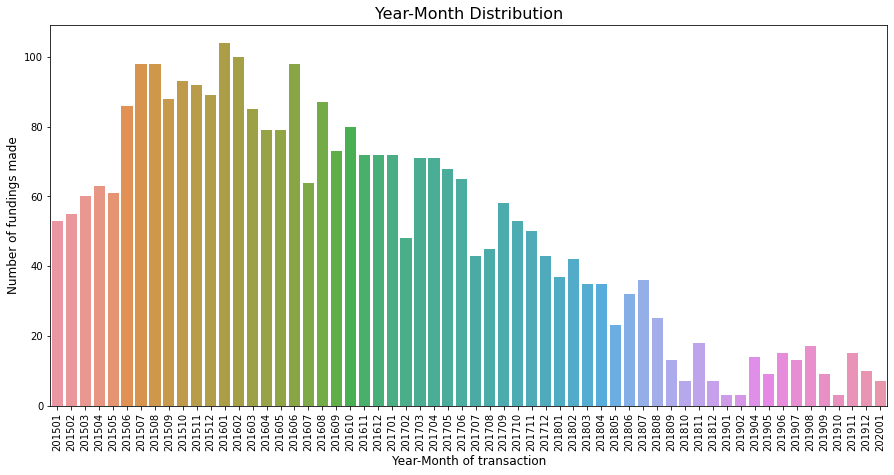

In [81]:
plt.figure(figsize=(15,7))
sns.barplot(x=year_month.index,y=year_month.values)
plt.xticks(rotation=90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

In [83]:
#What is the General Amount that Startups get in India?
df["AmountInUSD"].mean()

13270058.261169514

In [84]:
df["AmountInUSD"].value_counts().sort_values(ascending=False)

-999.0         971
 1000000.0     166
 500000.0      108
 2000000.0      69
 5000000.0      67
              ... 
 625000.0        1
 1070000.0       1
 12250000.0      1
 1950000.0       1
 3250000.0       1
Name: AmountInUSD, Length: 458, dtype: int64

In [86]:
print("Total number of startups funded", df["StartupName"].nunique())

Total number of startups funded 2457


In [98]:
#number of funding each startup got
df["StartupName"].value_counts().head(5)

Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Name: StartupName, dtype: int64

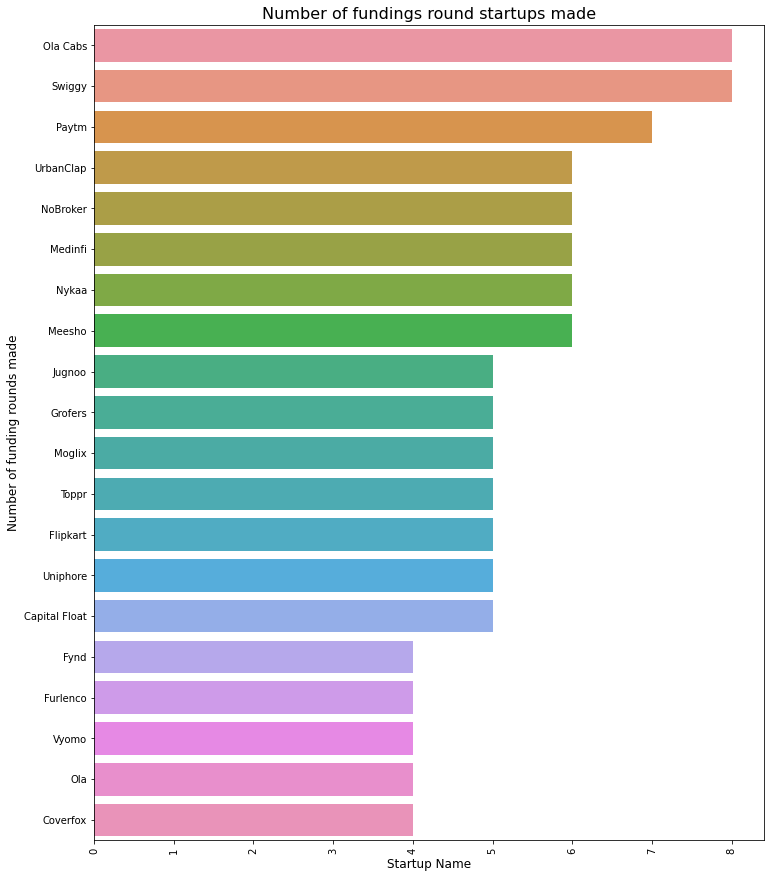

In [104]:
#plottiing the data
plt.figure(figsize=(12,15))
startup = df["StartupName"].value_counts().head(20)
sns.barplot(y=startup.index, x=startup.values)
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of funding rounds made', fontsize=12)
plt.title("Number of fundings round startups made", fontsize=16)
plt.show()

In [99]:
df[df["AmountInUSD"] == -999.0].head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
20,17/11/2019,Burger Singh,Food and Beverage,Indian Burger Brand,Gurgaon,RB Investments,Venture,-999.0,201911
34,21/10/2019,The Man Company,Consumer Goods,Beauty and Grooming,Gurgaon,Ayushmann Khurana,Corporate Round,-999.0,201910
58,19/08/2019,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,-999.0,201908
89,06/05/2019,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,-999.0,201905
91,05/05/2019,StyleDotMe,E-commerce,Fashion and Shopping,Delhi,Indian Angel Network and other angel investors...,Bridge Round,-999.0,201905


In [94]:
len(df[df["AmountInUSD"] == -999.0])

971

In [106]:
#Which Kind of Industries are more preferred for Startups?
df["IndustryVertical"].value_counts()

Consumer Internet                        941
Technology                               478
eCommerce                                186
Healthcare                                70
Finance                                   62
                                        ... 
Developer Portfolio Showcase platform      1
Doctors Network Mobile App                 1
End-to-End Lending platform                1
on-demand healthcare marketplace           1
Online Travel Marketplace                  1
Name: IndustryVertical, Length: 821, dtype: int64

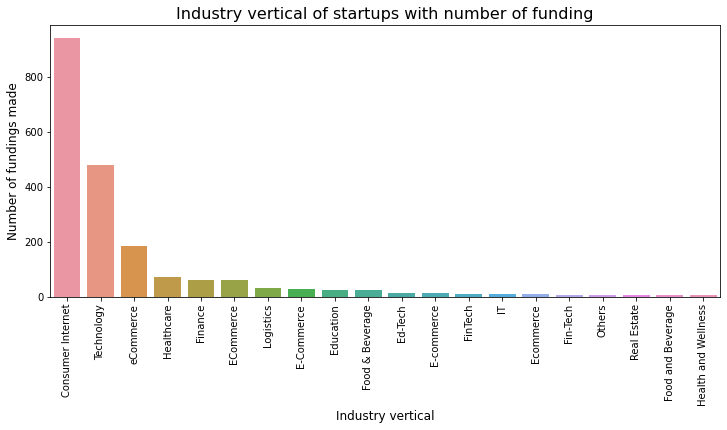

In [110]:
# plotting the graph
plt.figure(figsize=(12,5))
industry = df["IndustryVertical"].value_counts().head(20)
sns.barplot(x=industry.index, y=industry.values)
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

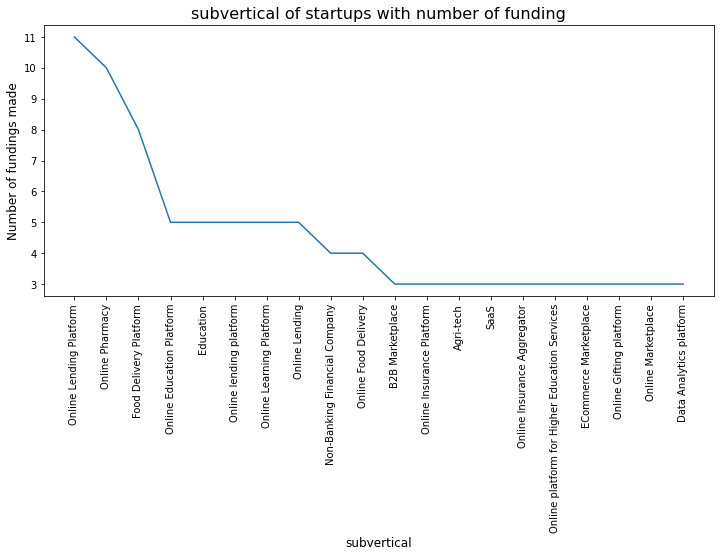

In [117]:
# plotting the graph
plt.figure(figsize=(12,5))
subvertical = df["SubVertical"].value_counts().head(20)
sns.lineplot(x=subvertical.index, y=subvertical.values)
plt.xticks(rotation='vertical')
plt.xlabel('subvertical', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("subvertical of startups with number of funding", fontsize=16)
plt.show()

In [114]:
df["SubVertical"].value_counts().head(20)

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Education Platform                         5
Education                                         5
Online lending platform                           5
Online Learning Platform                          5
Online Lending                                    5
Non-Banking Financial Company                     4
Online Food Delivery                              4
B2B Marketplace                                   3
Online Insurance Platform                         3
Agri-tech                                         3
SaaS                                              3
Online Insurance Aggregator                       3
Online platform for Higher Education Services     3
ECommerce Marketplace                             3
Online Gifting platform                           3
Online Marketplace                                3
Data Analyti

In [120]:
# Does Location also play a role, In determining the Growth of a Startup?
# df["City"].unique()
df["City"].value_counts()

Bangalore             701
Mumbai                568
New Delhi             424
Gurgaon               291
Bengaluru             141
                     ... 
Burnsville              1
Hubli                   1
Kerala                  1
Kozhikode               1
Dallas / Hyderabad      1
Name: City, Length: 107, dtype: int64

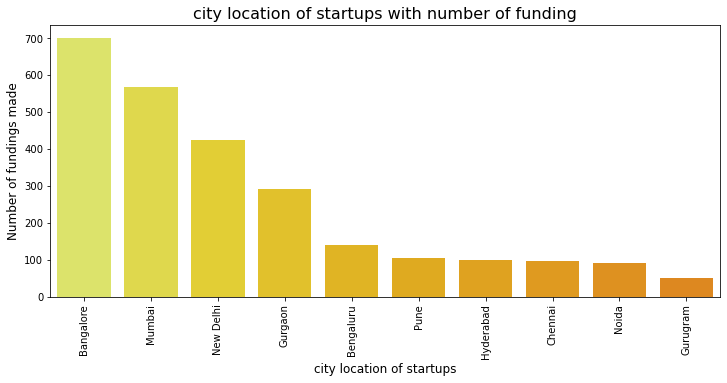

In [125]:
plt.figure(figsize=(12,5))
city = df["City"].value_counts().head(10)
sns.barplot(x=city.index, y=city.values, palette='Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

In [127]:
# Who plays the main role in Indian Startups Ecosystem?
df["InvestorsName"].value_counts()

Undisclosed Investors                                                                                                                                               39
Undisclosed investors                                                                                                                                               30
Ratan Tata                                                                                                                                                          25
Indian Angel Network                                                                                                                                                24
Kalaari Capital                                                                                                                                                     16
                                                                                                                                                                    .

In [129]:
df["InvestorsName"].value_counts()
df["InvestorsName"] == 'Undisclosed Investors'

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Name: InvestorsName, Length: 3044, dtype: bool

In [133]:
df["InvestorsName"][df["InvestorsName"] == 'Undisclosed Investors'] =  'Undisclosed Investors'
df["InvestorsName"][df["InvestorsName"] == 'undisclosed Investors'] =  'Undisclosed Investors'
df["InvestorsName"][df["InvestorsName"] == 'undisclosed investors'] =  'Undisclosed Investors'
df["InvestorsName"][df["InvestorsName"] == 'Undisclosed Investor'] =   'Undisclosed Investors'
df["InvestorsName"][df["InvestorsName"] == 'Undisclosed Investors'] =  'Undisclosed Investors'
df["InvestorsName"][df["InvestorsName"] == 'Undisclosed investors'] =  'Undisclosed Investors'
df["InvestorsName"][df["InvestorsName"] == 'Undisclosed'] =  'Undisclosed Investors'
df["InvestorsName"][df["InvestorsName"] == 'nan'] =  'Undisclosed Investors'

C:\Users\HP\AppData\Local\Temp/ipykernel_22536/1193087720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvestorsName"][df["InvestorsName"] == 'Undisclosed Investors'] =  'Undisclosed Investors'
C:\Users\HP\AppData\Local\Temp/ipykernel_22536/1193087720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvestorsName"][df["InvestorsName"] == 'undisclosed Investors'] =  'Undisclosed Investors'
C:\Users\HP\AppData\Local\Temp/ipykernel_22536/1193087720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [132]:
df["InvestorsName"].unique()

array(['Tiger Global Management', 'Susquehanna Growth Equity',
       'Sequoia Capital India', ..., 'KARSEMVEN Fund',
       'Exfinity Fund, GrowX Ventures.',
       'UK based Group of Angel Investors'], dtype=object)

In [134]:
df["InvestorsName"].value_counts()

Undisclosed Investors                                                              103
Ratan Tata                                                                          25
Indian Angel Network                                                                24
Kalaari Capital                                                                     16
Sequoia Capital                                                                     15
                                                                                  ... 
Samridhi Fund                                                                        1
Malini Patel, Stelcore Management Services, Anjani Prasad                            1
Om Chaudhry                                                                          1
Meher Roy, Nikhil Arora, Meet Kanodia, Krit Sankalp, Nitish Singh, Risabh Gupta      1
UK based Group of Angel Investors                                                    1
Name: InvestorsName, Length: 2404, dtype: i

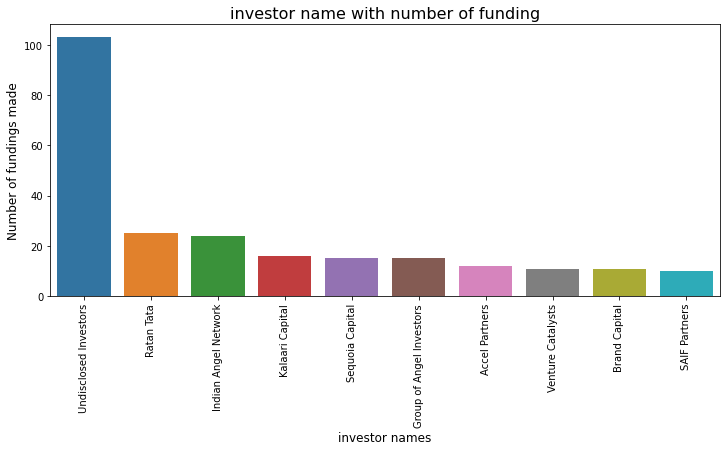

In [137]:
plt.figure(figsize=(12,5))
investor = df["InvestorsName"].value_counts().head(10)
sns.barplot(x=investor.index, y=investor.values)
plt.xticks(rotation='vertical')
plt.xlabel('investor names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("investor name with number of funding", fontsize=16)
plt.show()

In [148]:
# What are the different Types of Funding for Startups?
df["InvestmentType"].value_counts()

Private Equity                 1356
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Pre-Series A                      4
Private Equity Round              4
Seed                              4
Seed / Angle Funding              3
pre-Series A                      2
Venture Round                     2
Equity                            2
Corporate Round                   2
Series E                          2
Series F                          2
Private                           1
Debt-Funding                      1
Term Loan                         1
Seed funding                      1
PrivateEquity               

In [157]:
df["InvestmentType"][df["InvestmentType"] == 'Seed/ Angel Funding'] =  'Seed Angel Funding'
df["InvestmentType"][df["InvestmentType"] == 'Seed / Angel Funding'] =  'Seed Angel Funding'
df["InvestmentType"][df["InvestmentType"] == 'Seed / Angle Funding'] =  'Seed Angel Funding'
df["InvestmentType"][df["InvestmentType"] == 'Angel / Seed Funding'] =   'Seed Angel Funding'
df["InvestmentType"][df["InvestmentType"] == 'Seed/Angel Funding'] =  'Seed Angel Funding'
df["InvestmentType"][df["InvestmentType"] == 'Seed funding'] =  'Seed Funding'
df["InvestmentType"][df["InvestmentType"] == 'Private\\nEquity '] =  'Private Equity'
df["InvestmentType"][df["InvestmentType"] == 'Seed\\nFunding'] =  'Seed Funding'


C:\Users\HP\AppData\Local\Temp/ipykernel_22536/1364012821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvestmentType"][df["InvestmentType"] == 'Seed/ Angel Funding'] =  'Seed Angel Funding'
C:\Users\HP\AppData\Local\Temp/ipykernel_22536/1364012821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvestmentType"][df["InvestmentType"] == 'Seed / Angel Funding'] =  'Seed Angel Funding'
C:\Users\HP\AppData\Local\Temp/ipykernel_22536/1364012821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [158]:
df["InvestmentType"].value_counts()

Private Equity                 1356
Seed Funding                   1356
Seed Angel Funding              141
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
Seed Round                        7
Pre-Series A                      4
Private Equity Round              4
Seed                              4
Series F                          2
Venture Round                     2
Equity                            2
pre-Series A                      2
Corporate Round                   2
Series E                          2
Structured Debt                   1
Private                           1
Private Funding                   1
Term Loan                         1
Angel Funding                     1
Equity Based Funding              1
Series B (Extension)              1
Debt                              1
PrivateEquity               

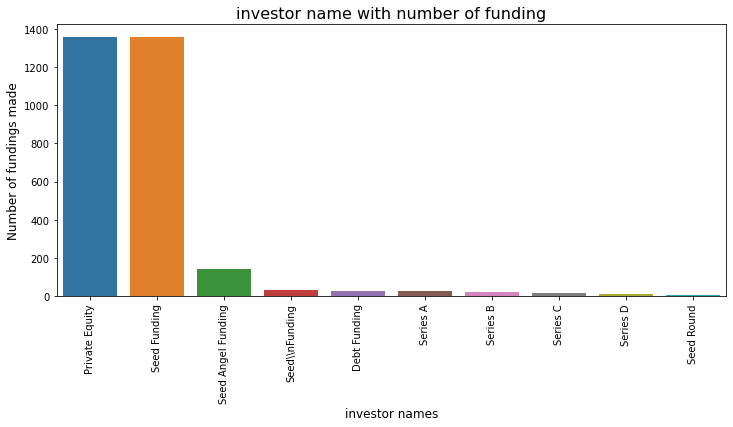

In [159]:
plt.figure(figsize=(12,5))
investment= df["InvestmentType"].value_counts().head(10)
sns.barplot(x=investment.index, y=investment.values)
plt.xticks(rotation='vertical')
plt.xlabel('investor names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("investor name with number of funding", fontsize=16)
plt.show()

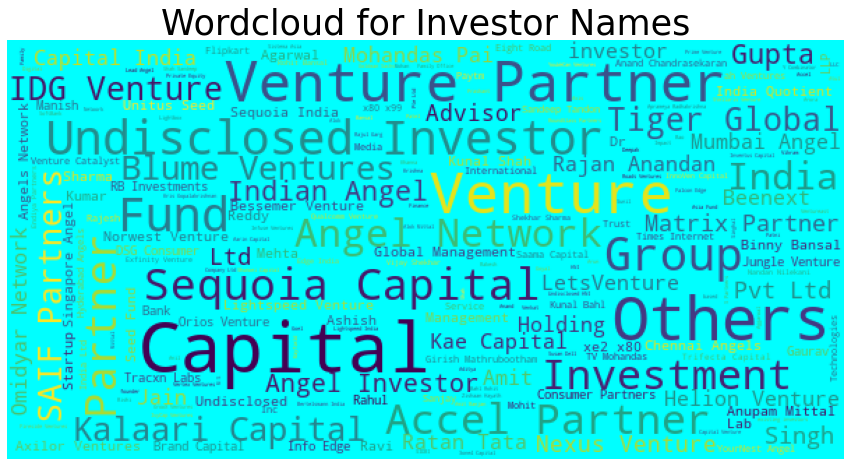

In [164]:
from wordcloud import WordCloud

names = df["InvestorsName"][~pd.isnull(df["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

In [161]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
